# Bank Note Authentication

Data were extracted from images that were taken genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400 x 400 pixels. Due to the object lens and distance to investigated object gray_scale pictures with resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("BankNote_Authentication.csv.xls")

In [6]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [4]:
columns1 = df.columns[:-1]
columns1

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

In [5]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,4]b

[1, 2, 3, 4]


### Feature Scailing

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
a = scaler.fit_transform(X)
a 

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [9]:
X = pd.DataFrame(a,columns = columns1)

In [10]:
X

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [11]:
X.head()

,variance,skewness,curtosis,entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [12]:
# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

## Machine Learning Classification Algorithms

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
LogisticModel = LogisticRegression(solver = "liblinear", random_state=0)

In [17]:
LogisticModel.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [18]:
LogisticModel.classes_

array([0, 1])

In [19]:
LogisticModel.predict(X_test)
LogisticModel.score(X_test,y_test)

0.9830097087378641

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, LogisticModel.predict(X_test))

array([[225,   7],
       [  0, 180]])

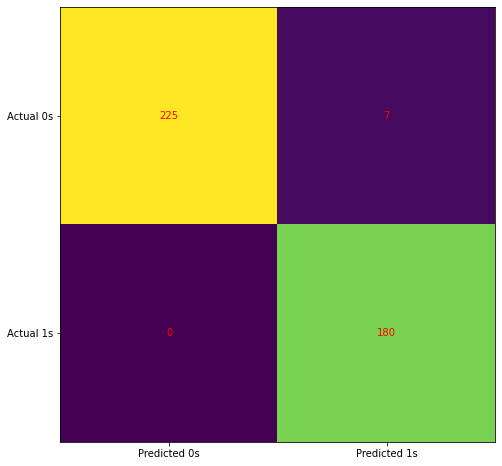

In [21]:
cm = confusion_matrix(y_test, LogisticModel.predict(X_test))

fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels = ("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks =(0,1),ticklabels = ("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha="center",va="center", color = "red")
plt.show()

In [22]:
print(classification_report(y_test,LogisticModel.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       232
           1       0.96      1.00      0.98       180

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



##### Applying Hyperparameter Tunning on Logistic Regression

In [23]:
params  = {
    "penalty" : ['l1', 'l2', 'elasticnet', 'none'],
    "dual" : [True,False],
    "random_state" : [0,0.1,0.2,0.3],
    "solver" : ['newton-cg','lbfgs','liblinear', 'sag', 'saga'],
    #"max_iter" : [50,100,200,300],
    "multi_class" : ['auto', 'ovr', 'multinomial'],
    "C" : [100,10,1.0,0.1,0.01,0.5]
}

In [24]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [25]:
classifier  = LogisticRegression()

In [26]:
random_search_logistic = RandomizedSearchCV(classifier, param_distributions=params,n_iter=100,scoring="roc_auc",n_jobs=-1,cv=5,verbose=3)

In [27]:
random_search_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/anaconda3/envs/test/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.99964897        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan 0.99964897        nan        nan        nan        nan
        nan        nan        nan        na

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01, 0.5],
                                        'dual': [True, False],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'random_state': [0, 0.1, 0.2, 0.3],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [28]:
random_search_logistic.best_estimator_

LogisticRegression(C=10, random_state=0, solver='newton-cg')

In [29]:
random_search_logistic.best_params_

{'solver': 'newton-cg',
 'random_state': 0,
 'penalty': 'l2',
 'multi_class': 'auto',
 'dual': False,
 'C': 10}

In [30]:
HyperLogisticModel = LogisticRegression(solver= 'lbfgs',random_state = 0,penalty= 'l2',multi_class='auto',dual= False,C= 10)


In [31]:
HyperLogisticModel.fit(X_train,y_train)
HyperLogisticModel.predict(X_test)
HyperLogisticModel.score(X_test,y_test)

0.9878640776699029

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, HyperLogisticModel.predict(X_test))

array([[227,   5],
       [  0, 180]])

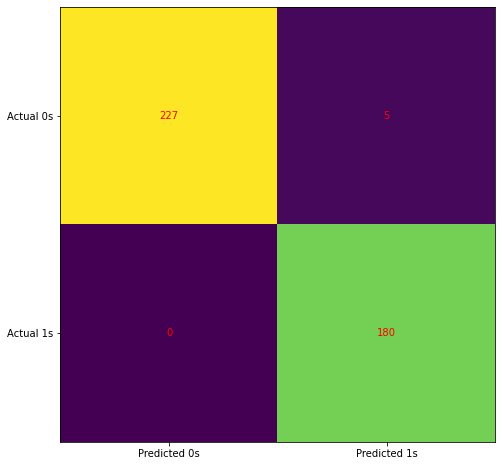

In [33]:
cm = confusion_matrix(y_test, HyperLogisticModel.predict(X_test))

fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels = ("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks =(0,1),ticklabels = ("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha="center",va="center", color = "red")
plt.show()

### Naive Bayes Algorithm

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
np_pred = nb.predict(X_test)

In [35]:
nb.score(X_test,y_test)

0.8325242718446602

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, nb.predict(X_test))

array([[199,  33],
       [ 36, 144]])

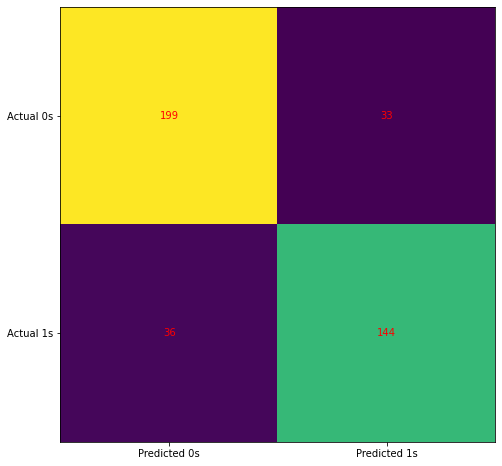

In [37]:
cm = confusion_matrix(y_test, nb.predict(X_test))

fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels = ("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks =(0,1),ticklabels = ("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha="center",va="center", color = "red")
plt.show()

### K Nearest Algorithm 

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0024271844660194173, 0.0048543689320388345, 0.0048543689320388345, 0.0048543689320388345, 0.0048543689320388345, 0.0048543689320388345, 0.0048543689320388345, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253, 0.007281553398058253]


Text(0, 0.5, 'Error rate')

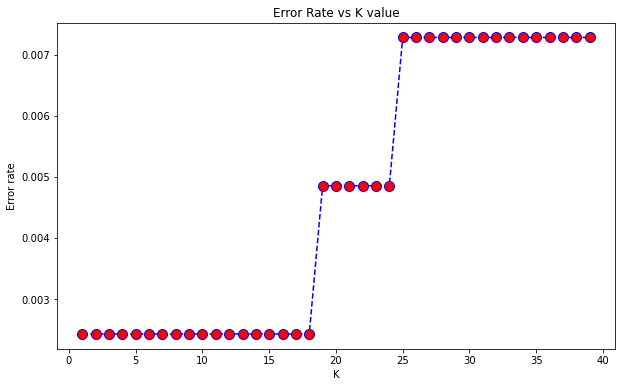

In [40]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = "blue",linestyle= "dashed",marker = "o",
        markerfacecolor = 'red',markersize = 10)
plt.title("Error Rate vs K value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [41]:
pred = knn.predict(X_test)

In [42]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train,y_train)
pred_i = knn.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
print(confusion_matrix(y_test,pred))

[[229   3]
 [  0 180]]


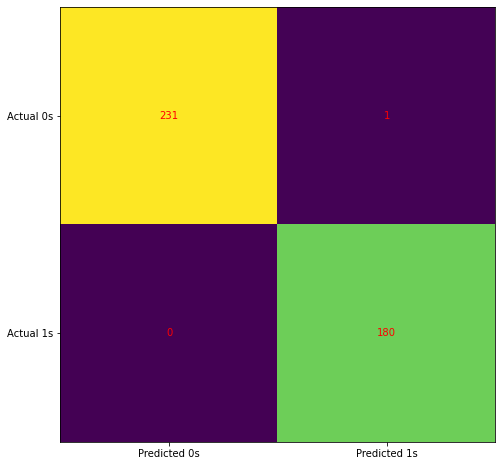

In [45]:
cm = confusion_matrix(y_test, knn.predict(X_test))

fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels = ("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks =(0,1),ticklabels = ("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha="center",va="center", color = "red")
plt.show()

### Random Forest Algorithm

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,y_train)
rf_pred = rf_classifier.predict(X_test)

In [52]:
rf_classifier.score(X_test,y_test)

0.9878640776699029

In [54]:
from sklearn.metrics import classification_report , confusion_matrix

In [55]:
print(confusion_matrix(y_test,rf_pred))

[[229   3]
 [  2 178]]


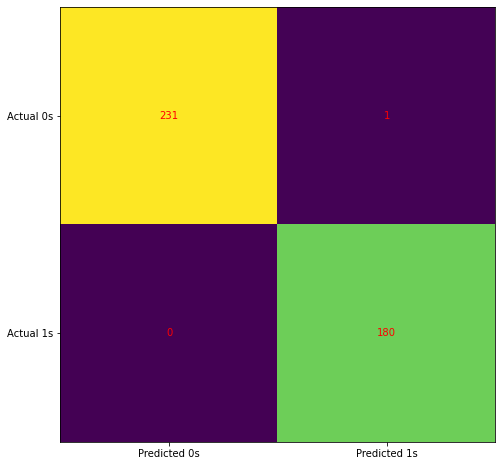

In [56]:
cm = confusion_matrix(y_test, knn.predict(X_test))

fig , ax = plt.subplots(figsize = (8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels = ("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks =(0,1),ticklabels = ("Actual 0s","Actual 1s"))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j], ha="center",va="center", color = "red")
plt.show()

In [57]:
#check accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,rf_pred)

In [58]:
score

0.9878640776699029

In [59]:
##create a pickle file a serialization
import pickle
pickle_out = open("Classifier.pkl","wb")
pickle.dump(rf_classifier,pickle_out)
pickle_out.close()
